In [95]:
### Setup for the module
import csv
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import date, datetime
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from sklearn.linear_model import LinearRegression

fn = 'Apt106_2015.csv'

<IPython.core.display.Javascript object>


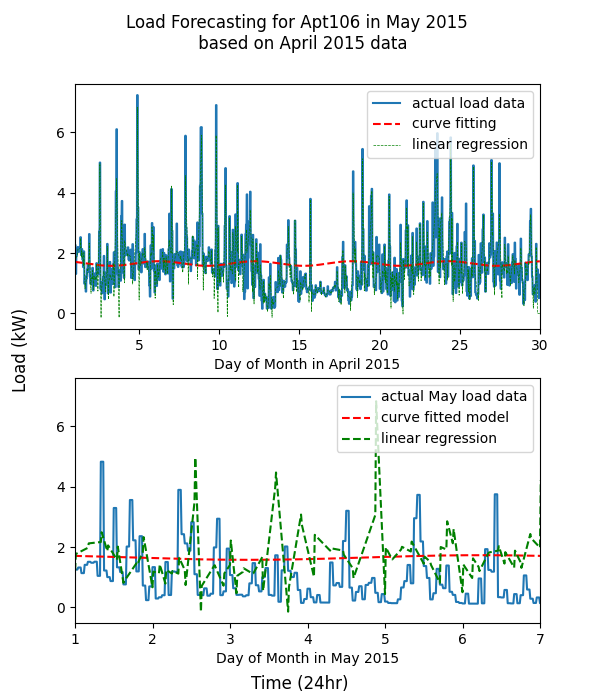

RMS Error for Curve Fitting: 1.1305898812715423 kW
RMS Error for Linear Regression: 1.4190159279249905 kW


In [109]:
%matplotlib notebook
# Prints the load for each day of the month for building Apt 100 based on the average every hour,
# data trends eclipsed as a whole for each individual day

from numpy import sin
from numpy import sqrt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# determine root means square error of the two signals being input
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

# rejection of outliers in order to find the peak 
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

# the true objective function, the curve to be fit to (based on a sinusoid general form)
def objective(x, a, b, c, d):
    return a * sin(b*(x-c))+ d

# opens the csv file
with open(fn, newline = '') as csvfile:
            reader = csv.reader(csvfile, 'excel')
            ti, usage = zip(*reader)
            t = [None]*(len(ti)//4)
            u = np.zeros(len(usage)//4)
            
            # averaging mechanism for the points for each hour
            for i in range(0, len(usage), 4):
                if(i >= len(u)):
                    break  
                if (i == len(u) - 3):
                    u[i:i+3] = 3*[np.average([float(x) for x in usage[i:i+4]])]
                    break
                u[i:i+4] = 4*[np.average([float(x) for x in usage[i:i+4]])]
            
            # getting the associated axis labels for days of the month                      
            for i in range(0, len(ti), 4):
                if(i >= len(t)):
                    break
                t[i:i+4] = 4*[datetime.fromisoformat(ti[i]).isoformat()]
            ap1 = t.index("2015-04-01T00:00:00")
            ap2 = t.index("2015-05-01T00:00:00")
            u1 = u[ap1:ap1+24*4*30]
            # plot settings, spacing the days out on the x axis
            t = (1/96) * np.array(range(0, len(u1)))
            popt, _ = curve_fit(objective, t,u1)
            a, b, c, d = popt
            y_line = objective(t, a, b, c, d)
         
            
            u2 = u[ap2:ap2+24*4*31]
            # plot settings, spacing the days out on the x axis
            t2 = (1/96) * np.array(range(0, len(u2)))
            
            linreg = np.zeros(len(u1))
            peaks, _ = find_peaks(u1, height=0)
            model = LinearRegression()
            model.fit(np.arange(0, peaks[0]).reshape(-1, 1), u1[0:peaks[0]])
            linreg[0:peaks[0]] = [(model.intercept_ + model.coef_*x) for x in np.arange(0, peaks[0])]
            for i in range(0, len(peaks)-1):
                model = LinearRegression()
                model.fit(np.arange(peaks[i], peaks[i+1]).reshape(-1, 1), u1[peaks[i]:peaks[i+1]])
                linreg[peaks[i]:peaks[i+1]] = [(model.intercept_ + model.coef_*x) for x in np.arange(peaks[i], peaks[i+1])]
            
            model = LinearRegression()
            model.fit(np.arange(peaks[-2], peaks[-1]).reshape(-1, 1), u1[peaks[-2]:peaks[-1]])
            linreg[peaks[-2]:peaks[-1]] = [(model.intercept_ + model.coef_*x) for x in np.arange(peaks[-2], peaks[-1])]
            
            fig, axs = plt.subplots(2, figsize=(6, 7), sharex=False, sharey=True)
            fig.suptitle("Load Forecasting for {} in May 2015 \n based on April 2015 data".format(fn[:-9]))
            axs[0].plot(t, u1, label="actual load data")
            axs[0].plot(t, y_line, '--', color='red', label = "curve fitting")
            axs[0].plot(t, linreg,'--', color='green',linewidth=0.5,label="linear regression")
            axs[0].legend(loc="upper right")
            axs[0].set_xlabel("Day of Month in April 2015")
            axs[1].set_xlabel("Day of Month in May 2015")
            axs[1].plot(t2, u2, label="actual May load data")
            axs[1].plot(t2, y_line[:len(t2)], '--', color='red', label="curve fitted model")
            axs[1].plot(t2, linreg[:len(t2)], '--', color='green',linewidth=1.5,label="linear regression")
            axs[0].set_xlim([1,30])
            axs[1].set_xlim([1,7])
            axs[1].legend(loc="upper right")
            
            print("RMS Error for Curve Fitting: {} kW".format(rmse(u2, y_line[:len(t2)])))
            print("RMS Error for Linear Regression: {} kW".format(rmse(u2, linreg[:len(t2)])))
            fig.supxlabel("Time (24hr)")
            fig.supylabel("Load (kW)")
            plt.show()
            

What day of April's data do you want to see? 4


<IPython.core.display.Javascript object>


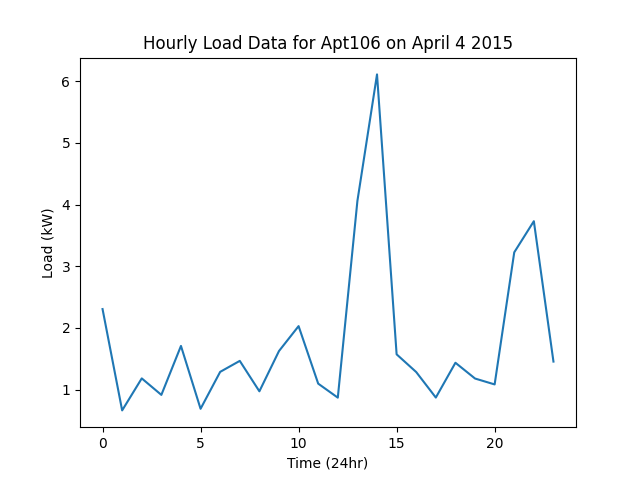

In [68]:



# Prints the load for each day of the month for building Apt 100 based on the average every hour,
# data trends eclipsed as a whole for each individual day
%matplotlib notebook
# opens the csv file
with open(fn, newline = '') as csvfile:
            reader = csv.reader(csvfile, 'excel')
            ti, usage = zip(*reader)
            t = [None]*(len(ti)//4)
            u = np.zeros(len(usage)//4)
            
            # averaging mechanism for the points for each hour
            for i in range(0, len(usage), 4):
                if(i >= len(u)):
                    break  
                if (i == len(u) - 3):
                    u[i:i+3] = 3*[np.average([float(x) for x in usage[i:i+4]])]
                    break
                u[i:i+4] = 4*[np.average([float(x) for x in usage[i:i+4]])]
            
            # getting the associated axis labels for days of the month                      
            for i in range(0, len(ti), 4):
                if(i >= len(t)):
                    break
                t[i:i+4] = 4*[datetime.fromisoformat(ti[i]).isoformat()]
            a = 0
            while (a < 1 or a > 30):
                a = int(input("What day of April's data do you want to see? "))

            ap1 = t.index("2015-04-01T00:00:00")+(a-1)*24*4
            t = [int(x[11:13]) for x in t[ap1:ap1+24*4]]
            u = u[ap1:ap1+24*4]
            # plot settings, spacing the days out on the x axis
            plt.plot(t,u)
            plt.xlabel("Time (24hr)")
            plt.ylabel("Load (kW)")
            plt.title("Hourly Load Data for {} on April {} 2015".format(fn[:-9], a))
            """
            fig, axs = plt.subplots(2, sharex=True, sharey=True)
            fig.suptitle("Hourly Load Data for {} on April {} 2015".format(fn[:-9], a))
            axs[0].plot(t, u)
            axs[0].set_xlabel('Time (24hr) on April {}'.format(a))
            axs[1].plot(t, u)
            axs[1].set_ylabel('Predicted Load (kW)')
            
            
            fig.supxlabel("Time (24hr)")
            fig.supylabel("Load (kW)")
            """
            plt.show()

What day of April's data do you want to see? 4


<IPython.core.display.Javascript object>


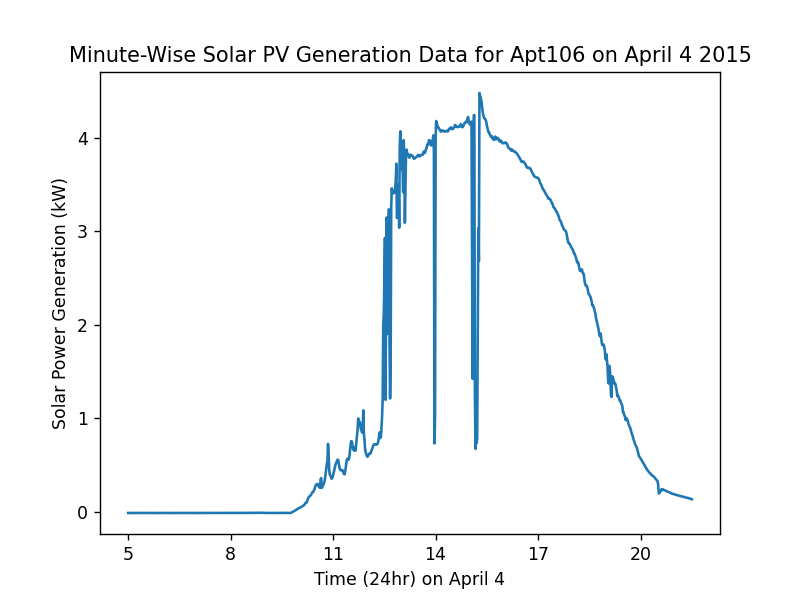

In [9]:
 %matplotlib notebook

# Prints the generation for a day of the month for building Apt 106, based on the solar generation plots for a minutely basis 
i = 0
while (i < 1 or i > 30):
    i = int(input("What day of April's data do you want to see? "))
# opens the csv file
if (i < 10):
    f = "solar_2015-04-0{}.csv".format(i)
elif (i < 31):
    f = "solar_2015-04-{}.csv".format(i)
with open(f, newline = '') as csvfile:
            reader = csv.reader(csvfile, 'excel')
            ti,lo,gen = zip(*reader)
            t = [None]*(len(ti))
            u = np.zeros(len(gen))
            # getting the associated axis labels for days of the month                      
            for j in range(0, len(ti)):
                t[j] = datetime.fromisoformat(lo[j]).time().strftime("%H:%M")

            for j in range(0, len(gen)):
                u[j] = float(gen[j])
            plt.plot(t,u)
            plt.xticks(np.arange(0, len(ti), 180), np.arange(5, 21, 3))
            plt.title("Minute-Wise Solar PV Generation Data for {} on April {} 2015".format(fn[:-9], i))
            plt.xlabel("Time (24hr) on April {}".format(i))
            plt.ylabel("Solar Power Generation (kW)")
            plt.show()
